In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/F_SUBAVG_EX")
except:
    print("F_SUBAVG_EX dir exists.")

    7
swivel = 0

#F ORDER
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]
swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]

# NF ORDER
#swivel_order = [22, 2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]
#swivel_order = [2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]

desired_dir_name = "F_SUBAVG_EX"
desired_file_prefix = "F_E" 

normalize_data=True

by_year = 1
lnconvert=False
 

F_SUBAVG_EX dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        
        desired_file_output = "./" + desired_dir_name + "/" + desired_file_prefix + "_" + str(2011+year) + "_"     
        
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
F_E1X_Violence_person_animals_all.csv
F_E3X_Fires_explosions_all.csv
F_E6X_Contact_object_equipment_all.csv
F_E5X_Substance_environment_all.csv
F_E2X_Transportation_all.csv
F_E4X_Falls_slips_trips_all.csv
dict_keys(['F_E1X_Violence_person_animals', 'F_E3X_Fires_explosions', 'F_E6X_Contact_object_equipment', 'F_E5X_Substance_environment', 'F_E2X_Transportation', 'F_E4X_Falls_slips_trips'])
code_found: 11-0000:Management Occupations
*gt(adding): F_E1X_Violence_person_animals_112021
F_E1X_Violence_person_animals
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
*gt(adding): F_E1X_Violence_person_animals_113011
F_E1X_Violence_person_animals
########## NEED TO EVAL ###############

In [8]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [9]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_F_E1X_Violence_person_animals_111011-Management Occupations', [3.285330997097958e-07, 2.7377758309149647e-07]]
['2011_F_E1X_Violence_person_animals_112021-Management Occupations', [0]]
['2011_F_E1X_Violence_person_animals_113011-Management Occupations', [2.1902206647319717e-07, 1.642665498548979e-07]]
['2011_F_E1X_Violence_person_animals_113121-Management Occupations', [0]]
['2011_F_E1X_Violence_person_animals_119013-Management Occupations', [1.0951103323659859e-06, 2.1902206647319717e-07, 1.642665498548979e-07, 1.149865848984285e-06, 3.285330997097958e-07]]
['2011_F_E1X_Violence_person_animals_119111-Management Occupations', [1.642665498548979e-07, 6.023106828012923e-07]]
['2011_F_E3X_Fires_explosions_111021-Management Occupations', [0]]
['2011_F_E3X_Fires_explosions_113071-Management Occupations', [5.475551661829929e-08]]
['2011_F_E3X_Fires_explosions_119013-Management Occupations', [2.7377758309149647e-07, 1.0951103323659858e-07]]
['2011_F_E3X_Fires_explosions_119121-Manageme

In [10]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0]]


In [11]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [12]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['F', 'E1X']
F_E1X


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./F_SUBAVG_EX/F_E_2018_110000_Management_Occupations_time_plots_.png


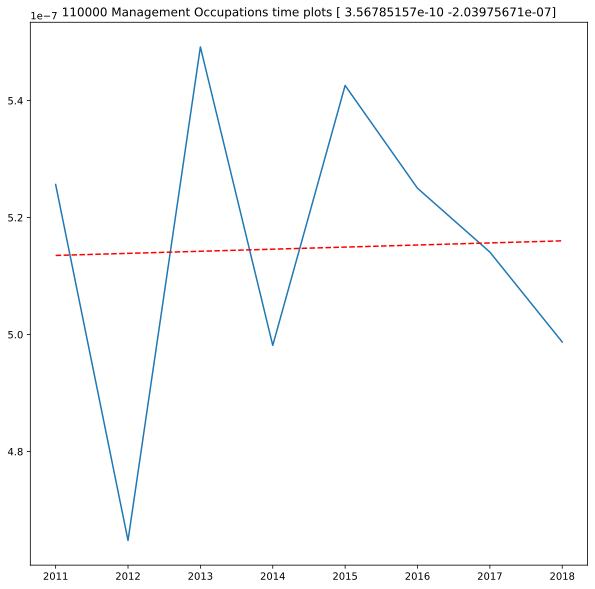

../PLOTS/./F_SUBAVG_EX/F_E_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


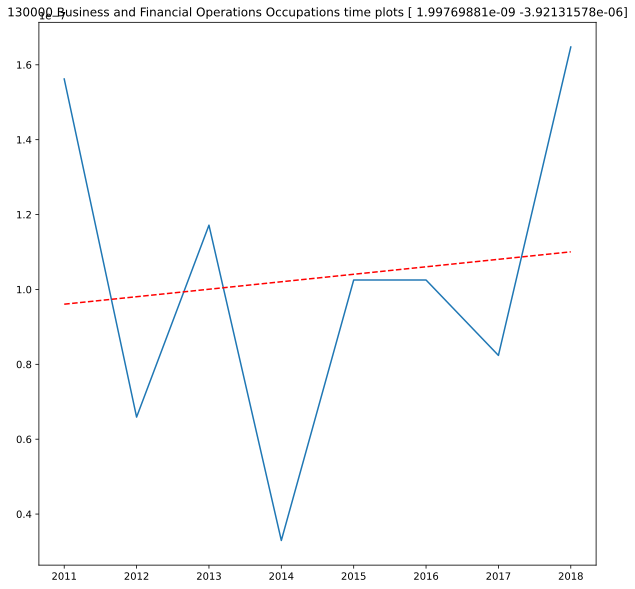

../PLOTS/./F_SUBAVG_EX/F_E_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


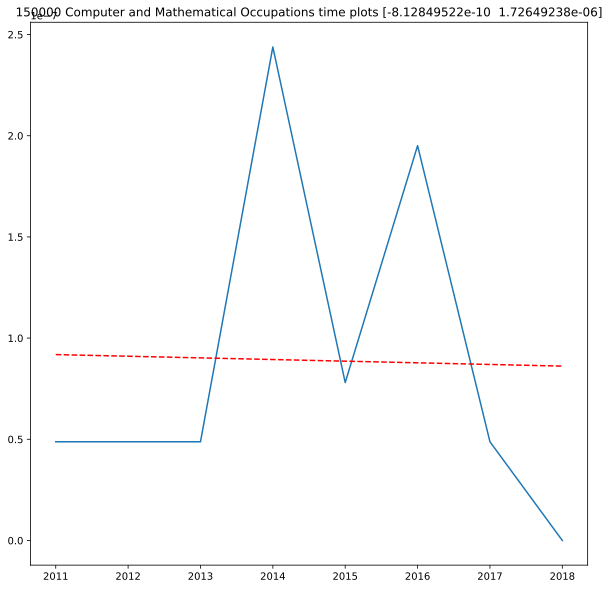

../PLOTS/./F_SUBAVG_EX/F_E_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


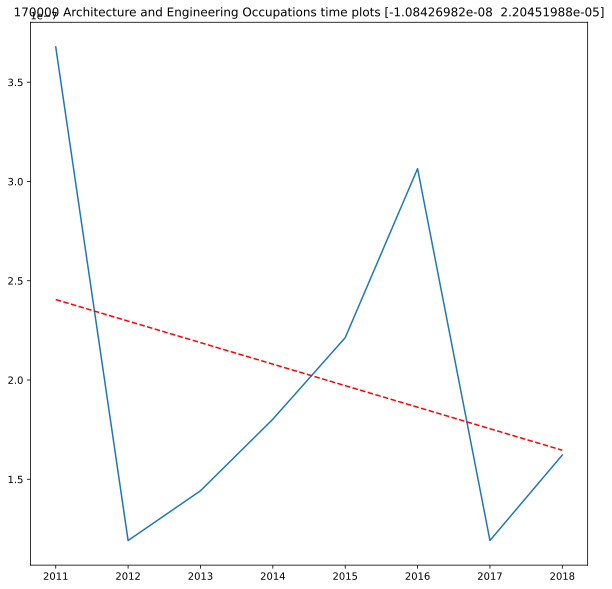

../PLOTS/./F_SUBAVG_EX/F_E_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


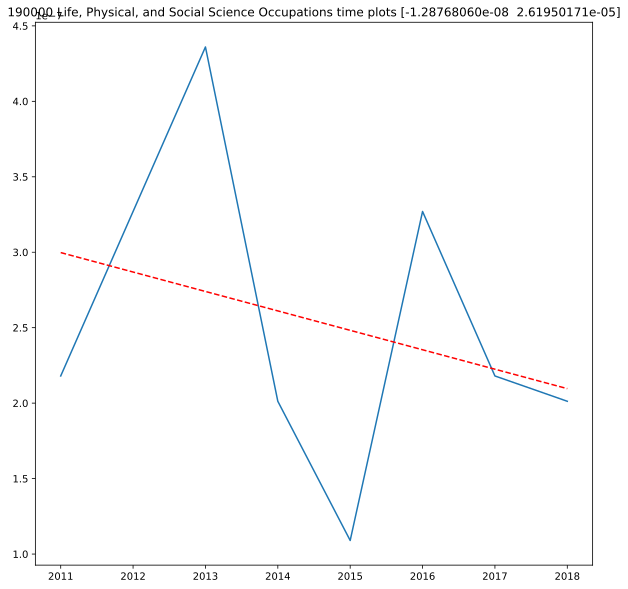

../PLOTS/./F_SUBAVG_EX/F_E_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


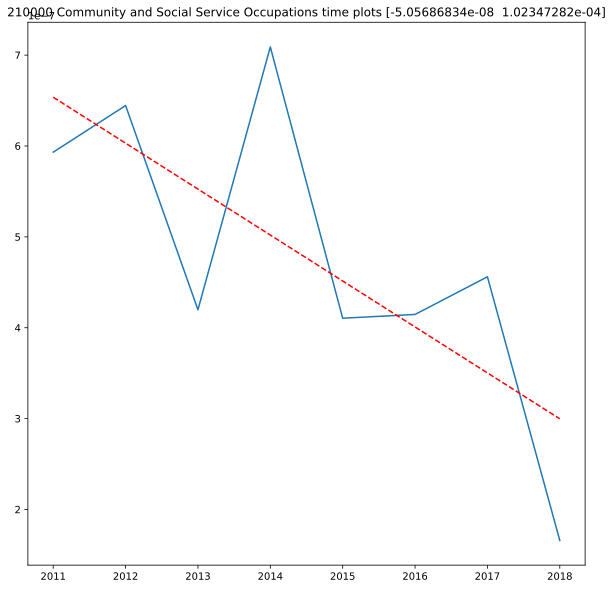

../PLOTS/./F_SUBAVG_EX/F_E_2018_230000_Legal_Occupations_time_plots_.png


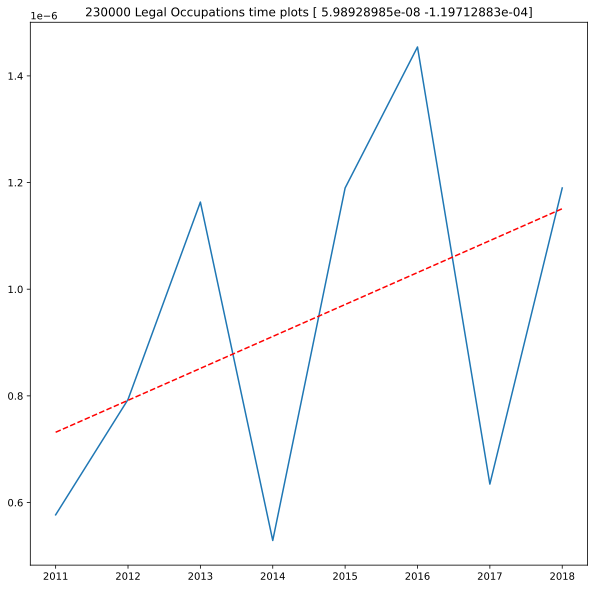

../PLOTS/./F_SUBAVG_EX/F_E_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


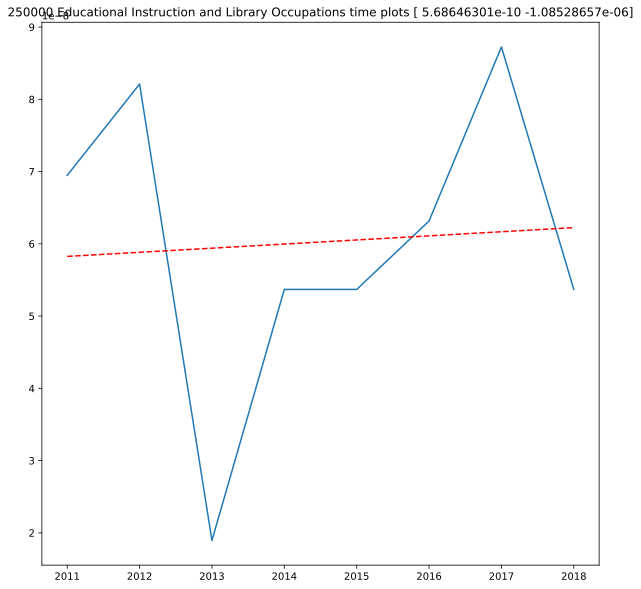

../PLOTS/./F_SUBAVG_EX/F_E_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


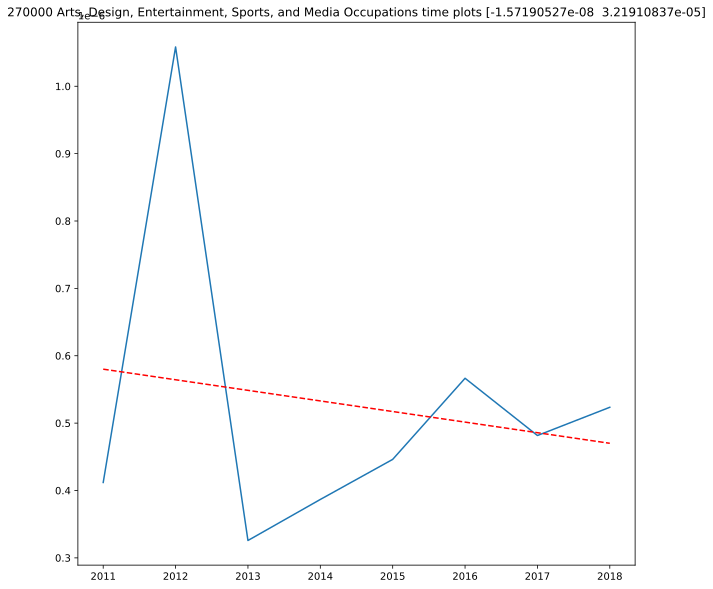

../PLOTS/./F_SUBAVG_EX/F_E_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


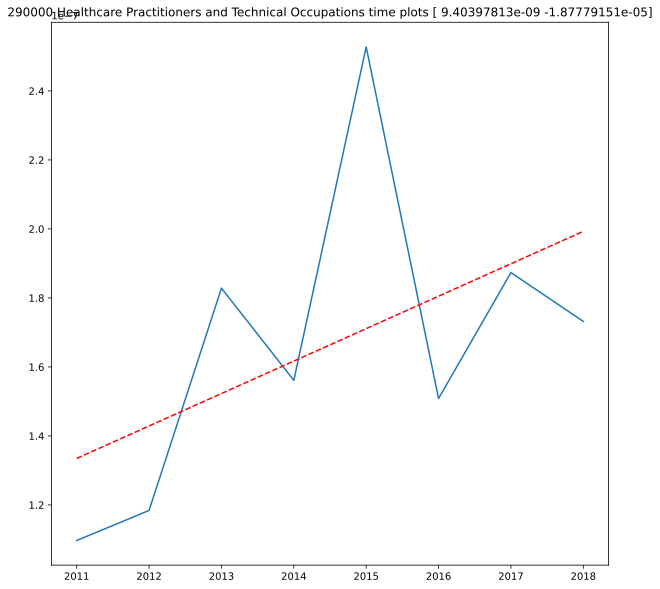

../PLOTS/./F_SUBAVG_EX/F_E_2018_310000_Healthcare_Support_Occupations_time_plots_.png


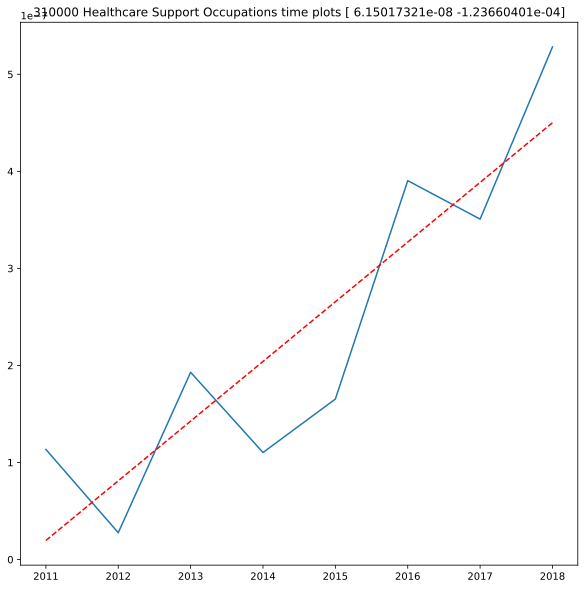

../PLOTS/./F_SUBAVG_EX/F_E_2018_330000_Protective_Service_Occupations_time_plots_.png


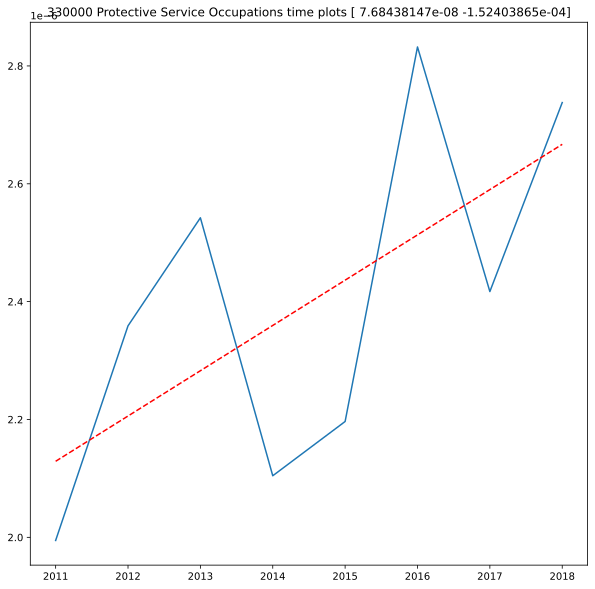

../PLOTS/./F_SUBAVG_EX/F_E_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


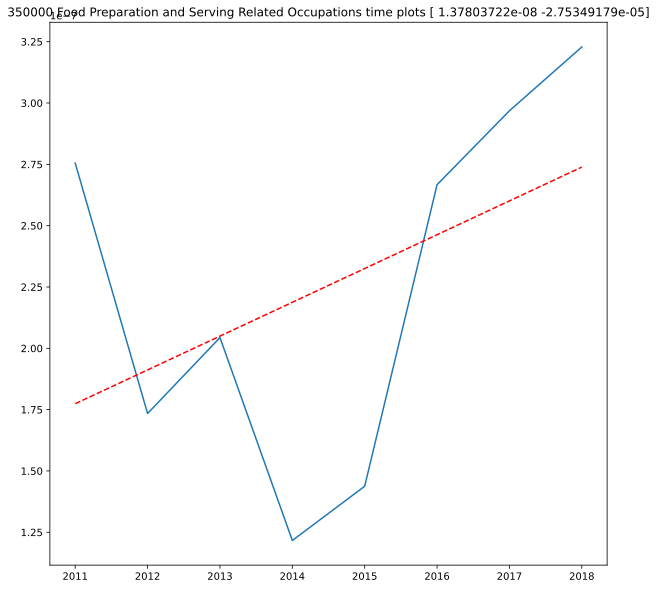

../PLOTS/./F_SUBAVG_EX/F_E_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


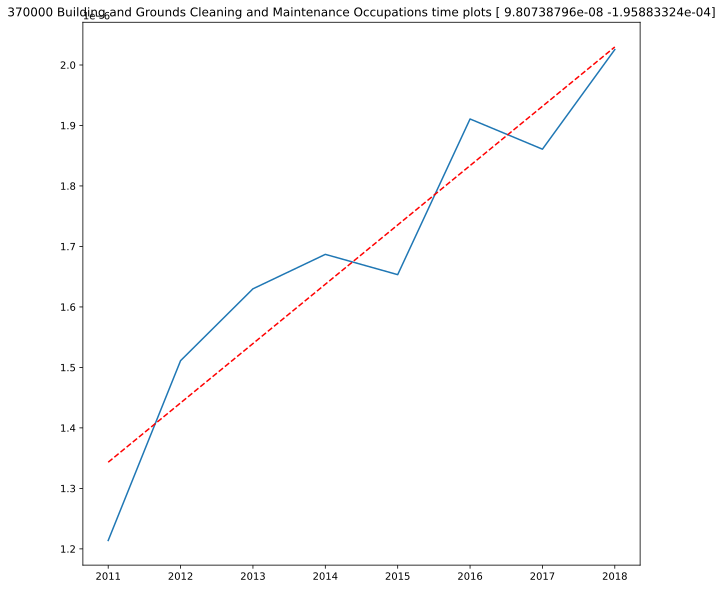

../PLOTS/./F_SUBAVG_EX/F_E_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


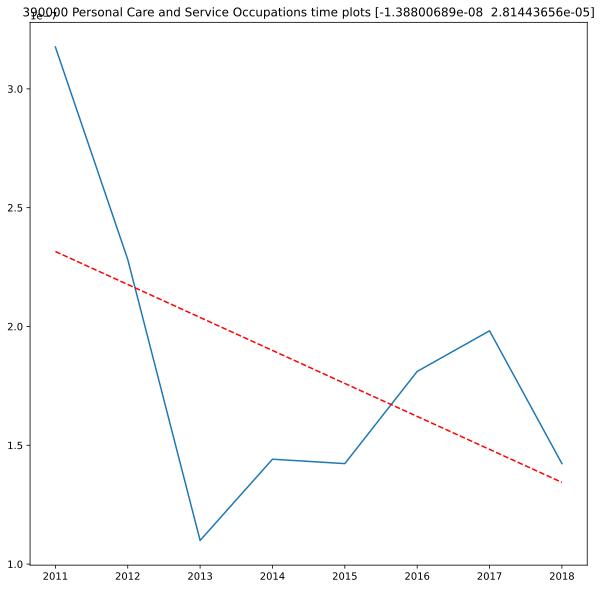

../PLOTS/./F_SUBAVG_EX/F_E_2018_410000_Sales_and_Related_Occupations_time_plots_.png


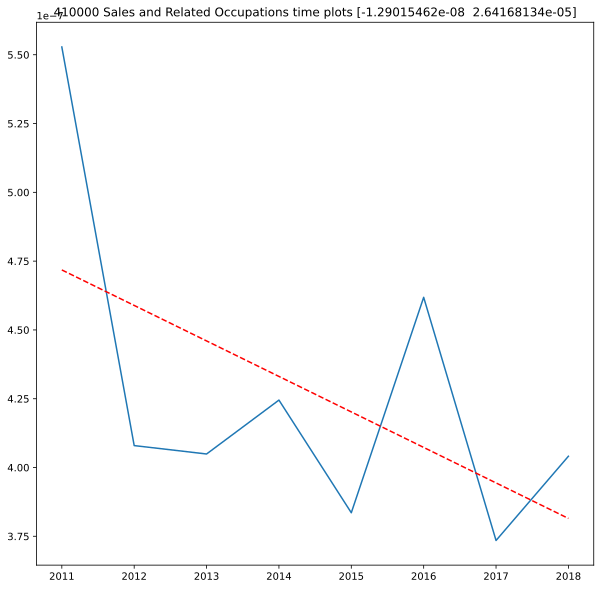

../PLOTS/./F_SUBAVG_EX/F_E_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


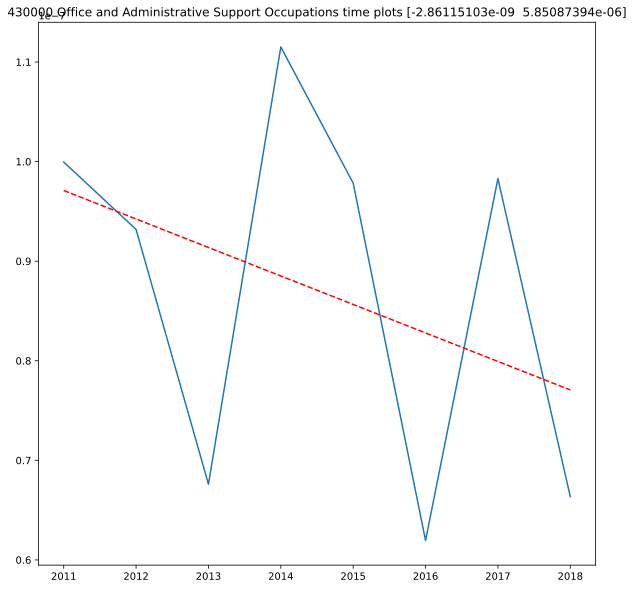

../PLOTS/./F_SUBAVG_EX/F_E_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


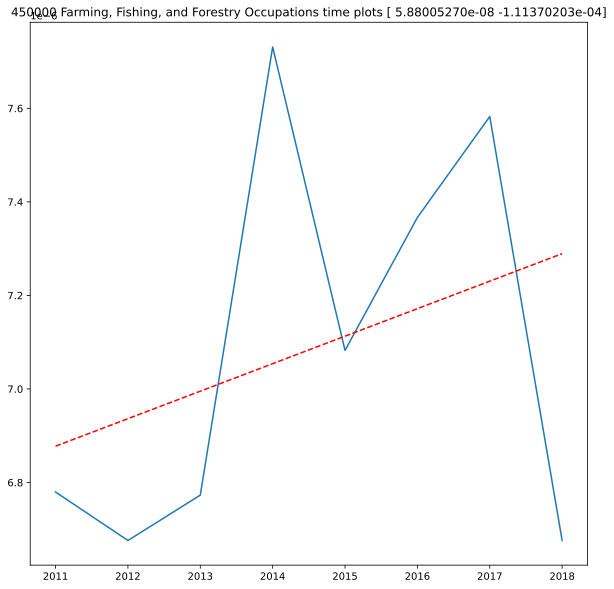

../PLOTS/./F_SUBAVG_EX/F_E_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


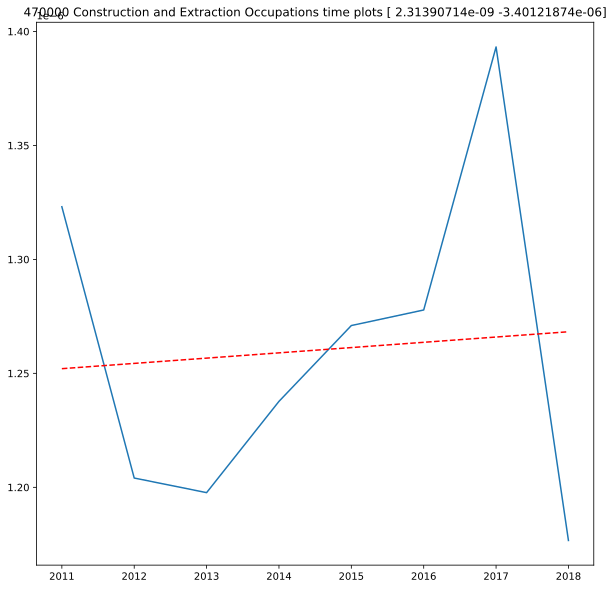

../PLOTS/./F_SUBAVG_EX/F_E_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


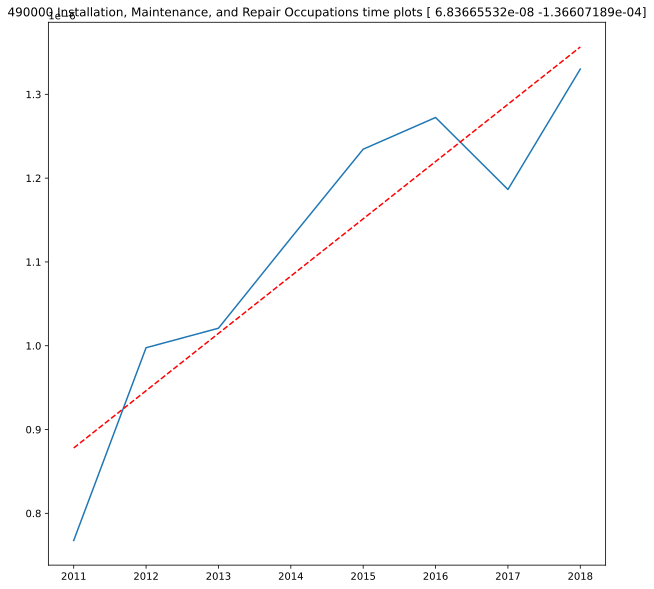

../PLOTS/./F_SUBAVG_EX/F_E_2018_510000_Production_Occupations_time_plots_.png


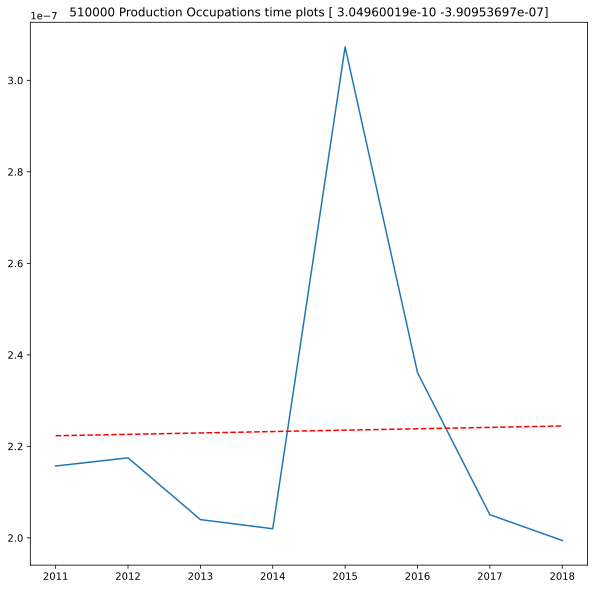

../PLOTS/./F_SUBAVG_EX/F_E_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


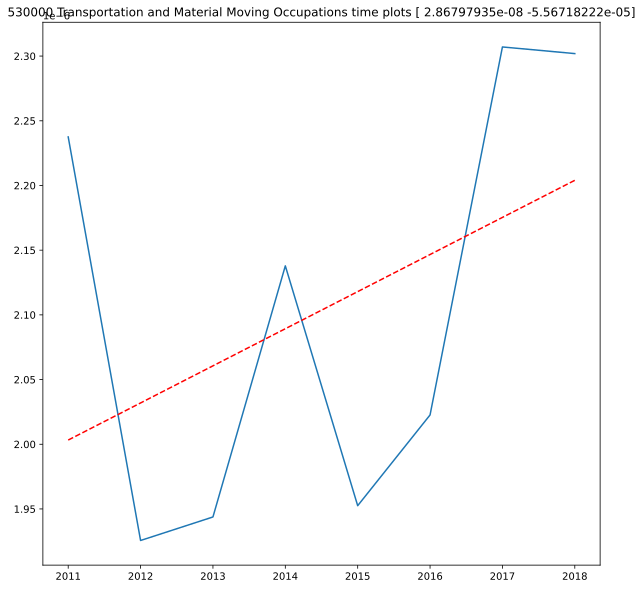

In [13]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
 
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
 
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [14]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y =  0.00000000 x + -0.00000020  : 110000 Management Occupations 
 y =  0.00000000 x + -0.00000392  : 130000 Business and Financial Operations Occupations 
 y = -0.00000000 x +  0.00000173  : 150000 Computer and Mathematical Occupations 
 y = -0.00000001 x +  0.00002205  : 170000 Architecture and Engineering Occupations 
 y = -0.00000001 x +  0.00002620  : 190000 Life, Physical, and Social Science Occupations 
 y = -0.00000005 x +  0.00010235  : 210000 Community and Social Service Occupations 
 y =  0.00000006 x + -0.00011971  : 230000 Legal Occupations 
 y =  0.00000000 x + -0.00000109  : 250000 Educational Instruction and Library Occupations 
 y = -0.00000002 x +  0.00003219  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y =  0.00000001 x + -0.00001878  : 290000 Healthcare Practitioners and Technical Occupations 
 y =  0.00000006 x + -0.00012366  : 310000 Healthcare Support Occupations 
 y =  0.00000008 x + -0.00015240  : 330000 Protective Service Occupations

# CALC COV 

In [15]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [16]:
# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

for i in range(0,len(code_list)):
       
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        

    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    
    if (math.isnan(omean)):
        ocov = 0.0
    else:
        ostd  = np.array(y).std()
        ocov  = ostd/omean
        
    #ocov.append(str(use_case),ocov)
    print("***",use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])
    else:
        print("########ERROR#######")
       

*** 110000 Management Occupations 0.04958756079659582
*** 130000 Business and Financial Operations Occupations 0.43586477279294716
*** 150000 Computer and Mathematical Occupations 0.885974193809322
*** 170000 Architecture and Engineering Occupations 0.33106495212655884
*** 190000 Life, Physical, and Social Science Occupations 0.3749827116993484
*** 210000 Community and Social Service Occupations 0.358892731565819
*** 230000 Legal Occupations 0.3171582813364268
*** 250000 Educational Instruction and Library Occupations 0.32856430653967744
*** 270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.19491406510746587
*** 290000 Healthcare Practitioners and Technical Occupations 0.2207206763879737
*** 310000 Healthcare Support Occupations 0.6440153104688534
*** 330000 Protective Service Occupations 0.09820498800427391
*** 350000 Food Preparation and Serving Related Occupations 0.3267074912398685
*** 370000 Building and Grounds Cleaning and Maintenance Occupations 0.090267697896

In [17]:
print(cov_array)

[['110000 Management Occupations', 0.04958756079659582], ['130000 Business and Financial Operations Occupations', 0.43586477279294716], ['150000 Computer and Mathematical Occupations', 0.885974193809322], ['170000 Architecture and Engineering Occupations', 0.33106495212655884], ['190000 Life, Physical, and Social Science Occupations', 0.3749827116993484], ['210000 Community and Social Service Occupations', 0.358892731565819], ['230000 Legal Occupations', 0.3171582813364268], ['250000 Educational Instruction and Library Occupations', 0.32856430653967744], ['270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.19491406510746587], ['290000 Healthcare Practitioners and Technical Occupations', 0.2207206763879737], ['310000 Healthcare Support Occupations', 0.6440153104688534], ['330000 Protective Service Occupations', 0.09820498800427391], ['350000 Food Preparation and Serving Related Occupations', 0.3267074912398685], ['370000 Building and Grounds Cleaning and Maintenance O

In [18]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0495876 	 110000 Management Occupations 
0.0562357 	 450000 Farming, Fishing, and Forestry Occupations 
0.0611138 	 410000 Sales and Related Occupations 
0.0668162 	 470000 Construction and Extraction Occupations 
0.0722294 	 530000 Transportation and Material Moving Occupations 
0.0902677 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0982050 	 330000 Protective Service Occupations 
0.1179235 	 490000 Installation, Maintenance, and Repair Occupations 
0.1504705 	 510000 Production Occupations 
0.1949141 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.2022496 	 430000 Office and Administrative Support Occupations 
0.2207207 	 290000 Healthcare Practitioners and Technical Occupations 
0.2967970 	 390000 Personal Care and Service Occupations 
0.3171583 	 230000 Legal Occupations 
0.3267075 	 350000 Food Preparation and Serving Related Occupations 
0.3285643 	 250000 Educational Instruction and Library Occupations 
0.3310650 	 170000 Archite

# MEAN

In [19]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 5.147680284834395e-07
130000 Business and Financial Operations Occupations 1.0658765724997438e-07
150000 Computer and Mathematical Occupations 8.900702301989857e-08
170000 Architecture and Engineering Occupations 1.876248507371076e-07
190000 Life, Physical, and Social Science Occupations 2.5469135181365396e-07
210000 Community and Social Service Occupations 4.4398038218000905e-07
230000 Legal Occupations 1.0510312004230566e-06
250000 Educational Instruction and Library Occupations 6.025140379355865e-08
270000 Arts, Design, Entertainment, Sports, and Media Occupations 4.2968565574157485e-07
290000 Healthcare Practitioners and Technical Occupations 1.7009518347985347e-07
310000 Healthcare Support Occupations 2.4132201040440225e-07
330000 Protective Service Occupations 2.4842906083904944e-06
350000 Food Pre

In [20]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    
    
    
# create sorted order index list
sorted_order = []
for i in range(0,len(test_list)):
    idx = str(test_list[i][0]).split(" ")[0][0:2]
    nidx = int( (int(idx) - 11) / 2 )
    sorted_order.append(nidx)
    
print(sorted_order)

0.0000001 	 250000 Educational Instruction and Library Occupations 
0.0000001 	 430000 Office and Administrative Support Occupations 
0.0000001 	 150000 Computer and Mathematical Occupations 
0.0000001 	 130000 Business and Financial Operations Occupations 
0.0000002 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000002 	 390000 Personal Care and Service Occupations 
0.0000002 	 170000 Architecture and Engineering Occupations 
0.0000002 	 350000 Food Preparation and Serving Related Occupations 
0.0000002 	 510000 Production Occupations 
0.0000002 	 310000 Healthcare Support Occupations 
0.0000003 	 190000 Life, Physical, and Social Science Occupations 
0.0000004 	 410000 Sales and Related Occupations 
0.0000004 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000004 	 210000 Community and Social Service Occupations 
0.0000005 	 110000 Management Occupations 
0.0000011 	 230000 Legal Occupations 
0.0000011 	 490000 Installation, Maintenance, and R

# COV LEVEL 3

In [21]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1512', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2540', '_2590', '_2530', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3190', '_3111', '_3120', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3950', '_3970', '_3990', '_3940', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5160', '_5180', '_5190', '_5191', '_5170', '_5151', '_5310', '_5330', '_5350', '_5360', '_5370', '_5340', '_5320', '_5371']


In [22]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

110000 Management Occupations 0.2772085641714776
110000 Management Occupations 0.5826677130457704
110000 Management Occupations 0.4250129891463415
110000 Management Occupations 2.6457513110645907
110000 Management Occupations 0.12623046013430908
110000 Management Occupations 0.23850650763855966
130000 Business and Financial Operations Occupations 0.5759168535284753
130000 Business and Financial Operations Occupations 0.6226998490772391
130000 Business and Financial Operations Occupations 0.7224940289571368
150000 Computer and Mathematical Occupations 0.8860951788894309
150000 Computer and Mathematical Occupations nan
170000 Architecture and Engineering Occupations 0.6880132663047125
170000 Architecture and Engineering Occupations 0.5977226138502415


/tmp/ipykernel_661511/3330299012.py:64: RuntimeWarning: invalid value encountered in double_scalars
  ocov  = ostd/omean


170000 Architecture and Engineering Occupations 1.0363754503432017
170000 Architecture and Engineering Occupations 1.2120791238484125
190000 Life, Physical, and Social Science Occupations 1.020204061220407
190000 Life, Physical, and Social Science Occupations 1.2247448713915892
190000 Life, Physical, and Social Science Occupations 0.914280936797438
190000 Life, Physical, and Social Science Occupations 0.8615231988880057
210000 Community and Social Service Occupations 0.47840959401434496
210000 Community and Social Service Occupations 0.5169322343511213
230000 Legal Occupations 0.31294787112834627
230000 Legal Occupations 2.6457513110645907
250000 Educational Instruction and Library Occupations 1.2909944487358056
250000 Educational Instruction and Library Occupations 1.414213562373095
250000 Educational Instruction and Library Occupations 0.795033136511297
250000 Educational Instruction and Library Occupations 1.4498416521560316
250000 Educational Instruction and Library Occupations 1.4

In [23]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0514369 	 470000 Construction and Extraction Occupations 
0.0853793 	 470000 Construction and Extraction Occupations 
0.0959072 	 450000 Farming, Fishing, and Forestry Occupations 
0.0978468 	 530000 Transportation and Material Moving Occupations 
0.1074162 	 490000 Installation, Maintenance, and Repair Occupations 
0.1155327 	 330000 Protective Service Occupations 
0.1156498 	 410000 Sales and Related Occupations 
0.1185785 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1241710 	 470000 Construction and Extraction Occupations 
0.1262305 	 110000 Management Occupations 
0.1285695 	 530000 Transportation and Material Moving Occupations 
0.1303567 	 510000 Production Occupations 
0.1427359 	 470000 Construction and Extraction Occupations 
0.1458378 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1466360 	 490000 Installation, Maintenance, and Repair Occupations 
0.1620389 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.

# VARIANCE ACROSS

In [24]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    print(code_list)
    
    return(code_list)

In [25]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [26]:
print(sorted_order)

[7, 16, 2, 1, 9, 14, 3, 12, 20, 10, 4, 15, 8, 5, 0, 6, 19, 18, 13, 21, 11, 17]


In [27]:
desired_case = "E6X_Contact"
get_case_list(1, desired_case)

['_E6X_Contact_11', '_E6X_Contact_13', '_E6X_Contact_15', '_E6X_Contact_17', '_E6X_Contact_19', '_E6X_Contact_21', '_E6X_Contact_23', '_E6X_Contact_25', '_E6X_Contact_27', '_E6X_Contact_29', '_E6X_Contact_31', '_E6X_Contact_33', '_E6X_Contact_35', '_E6X_Contact_37', '_E6X_Contact_39', '_E6X_Contact_41', '_E6X_Contact_43', '_E6X_Contact_45', '_E6X_Contact_47', '_E6X_Contact_49', '_E6X_Contact_51', '_E6X_Contact_53']


['_E6X_Contact_11',
 '_E6X_Contact_13',
 '_E6X_Contact_15',
 '_E6X_Contact_17',
 '_E6X_Contact_19',
 '_E6X_Contact_21',
 '_E6X_Contact_23',
 '_E6X_Contact_25',
 '_E6X_Contact_27',
 '_E6X_Contact_29',
 '_E6X_Contact_31',
 '_E6X_Contact_33',
 '_E6X_Contact_35',
 '_E6X_Contact_37',
 '_E6X_Contact_39',
 '_E6X_Contact_41',
 '_E6X_Contact_43',
 '_E6X_Contact_45',
 '_E6X_Contact_47',
 '_E6X_Contact_49',
 '_E6X_Contact_51',
 '_E6X_Contact_53']

In [28]:
cases = [ "Violence_person_animals", "Transportation", "Fires_explosions", "Falls_slips_trips", "Contact_object_equipment"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)
    
    #print(code_list)

    cov_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
        
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
        
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
                
                #print(ocup,case1,case2,case3)
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
                    
                    #print(tmp_lst)
      
      
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

['_Violence_person_animals_11', '_Violence_person_animals_13', '_Violence_person_animals_15', '_Violence_person_animals_17', '_Violence_person_animals_19', '_Violence_person_animals_21', '_Violence_person_animals_23', '_Violence_person_animals_25', '_Violence_person_animals_27', '_Violence_person_animals_29', '_Violence_person_animals_31', '_Violence_person_animals_33', '_Violence_person_animals_35', '_Violence_person_animals_37', '_Violence_person_animals_39', '_Violence_person_animals_41', '_Violence_person_animals_43', '_Violence_person_animals_45', '_Violence_person_animals_47', '_Violence_person_animals_49', '_Violence_person_animals_51', '_Violence_person_animals_53']
0.4308080 	 Violence_person_animals 250000 Educational Instruction and Library Occupations 
0.3034918 	 Violence_person_animals 430000 Office and Administrative Support Occupations 
1.2909944 	 Violence_person_animals 150000 Computer and Mathematical Occupations 
0.4199620 	 Violence_person_animals 130000 Business a

In [29]:
print(mult_array[2][1])

[['Fires_explosions 250000 Educational Instruction and Library Occupations', 0.0], ['Fires_explosions 430000 Office and Administrative Support Occupations', 2.6457513110645907], ['Fires_explosions 150000 Computer and Mathematical Occupations', 0.0], ['Fires_explosions 130000 Business and Financial Operations Occupations', 2.6457513110645907], ['Fires_explosions 290000 Healthcare Practitioners and Technical Occupations', 0.0], ['Fires_explosions 390000 Personal Care and Service Occupations', 2.6457513110645903], ['Fires_explosions 170000 Architecture and Engineering Occupations', 1.2909944487358056], ['Fires_explosions 350000 Food Preparation and Serving Related Occupations', 1.414213562373095], ['Fires_explosions 510000 Production Occupations', 0.36946005892339234], ['Fires_explosions 310000 Healthcare Support Occupations', 1.1135528725660044], ['Fires_explosions 190000 Life, Physical, and Social Science Occupations', 1.7320508075688774], ['Fires_explosions 410000 Sales and Related Occ

../PLOTS/./F_SUBAVG_EX/F_E_2018_Coef_by_EX.png


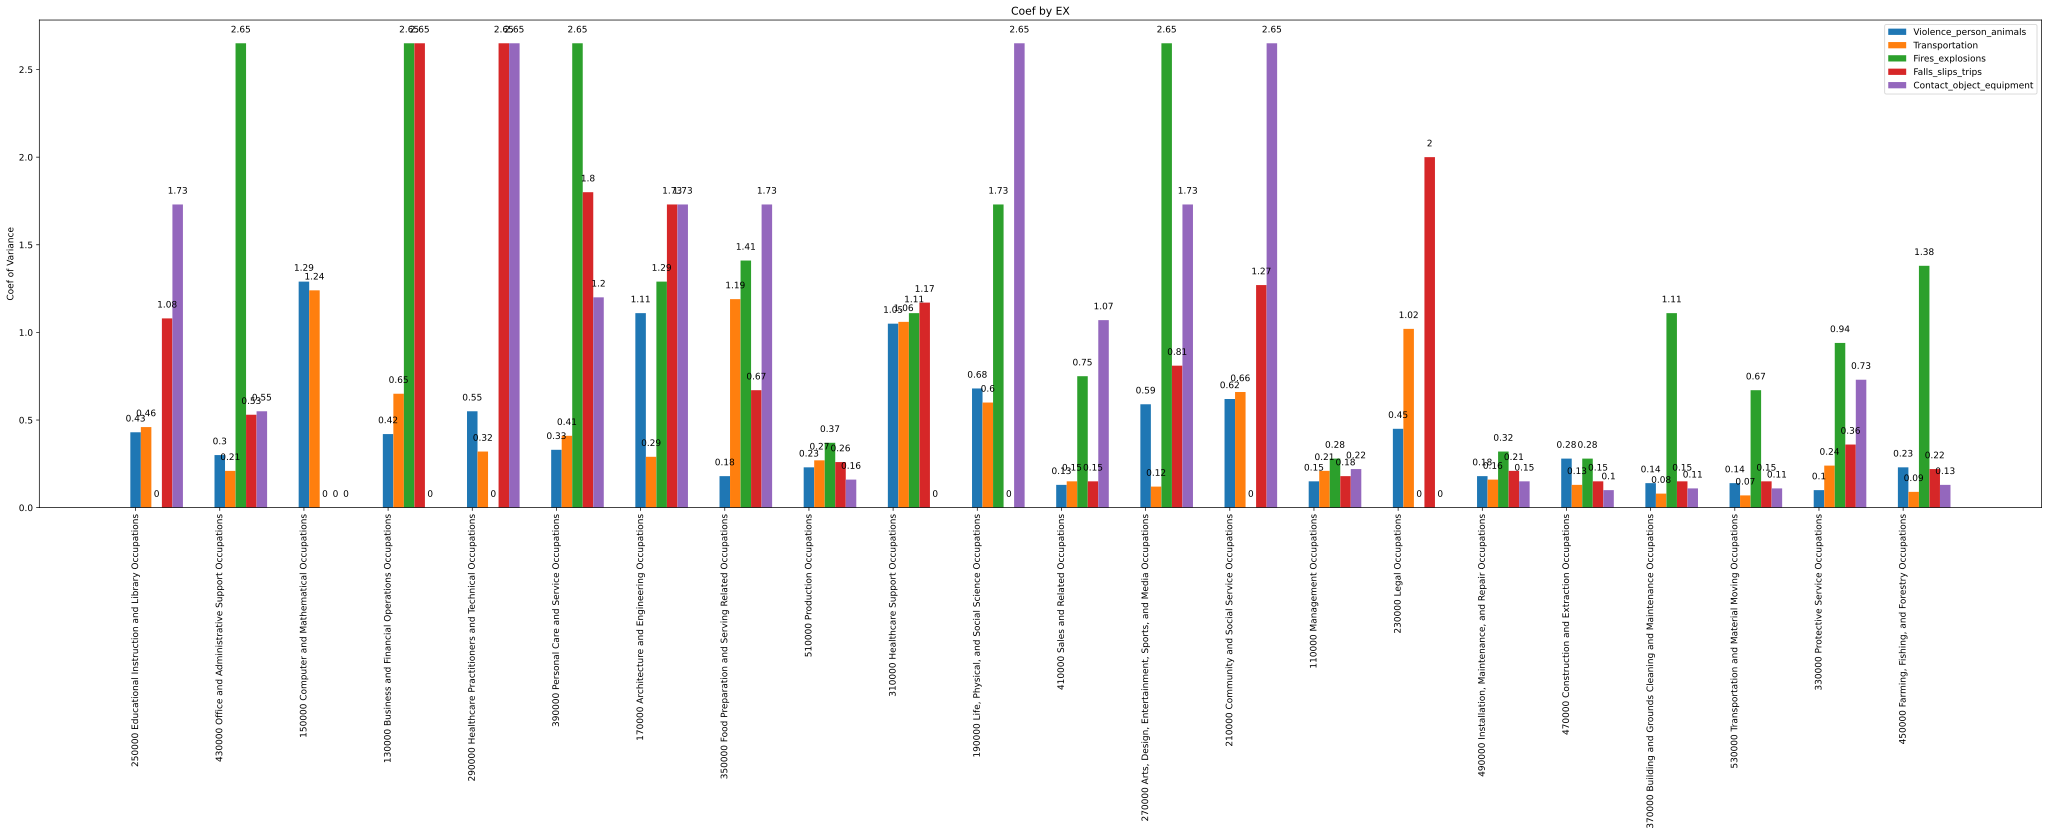

In [30]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
        
#print(labels)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)


title = "Coef by EX"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [31]:
cases = [ "Violence_person_animals", "Transportation", "Fires_explosions", "Falls_slips_trips", "Contact_object_equipment"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
        
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
    
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

['_Violence_person_animals_11', '_Violence_person_animals_13', '_Violence_person_animals_15', '_Violence_person_animals_17', '_Violence_person_animals_19', '_Violence_person_animals_21', '_Violence_person_animals_23', '_Violence_person_animals_25', '_Violence_person_animals_27', '_Violence_person_animals_29', '_Violence_person_animals_31', '_Violence_person_animals_33', '_Violence_person_animals_35', '_Violence_person_animals_37', '_Violence_person_animals_39', '_Violence_person_animals_41', '_Violence_person_animals_43', '_Violence_person_animals_45', '_Violence_person_animals_47', '_Violence_person_animals_49', '_Violence_person_animals_51', '_Violence_person_animals_53']
0.0000000 	 Violence_person_animals 250000 Educational Instruction and Library Occupations 
0.0000001 	 Violence_person_animals 430000 Office and Administrative Support Occupations 
0.0000001 	 Violence_person_animals 150000 Computer and Mathematical Occupations 
0.0000001 	 Violence_person_animals 130000 Business a

In [32]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
              
for i in range(0,len(labels)):
    print(labels[i])

 250000 Educational Instruction and Library Occupations
 430000 Office and Administrative Support Occupations
 150000 Computer and Mathematical Occupations
 130000 Business and Financial Operations Occupations
 290000 Healthcare Practitioners and Technical Occupations
 390000 Personal Care and Service Occupations
 170000 Architecture and Engineering Occupations
 350000 Food Preparation and Serving Related Occupations
 510000 Production Occupations
 310000 Healthcare Support Occupations
 190000 Life, Physical, and Social Science Occupations
 410000 Sales and Related Occupations
 270000 Arts, Design, Entertainment, Sports, and Media Occupations
 210000 Community and Social Service Occupations
 110000 Management Occupations
 230000 Legal Occupations
 490000 Installation, Maintenance, and Repair Occupations
 470000 Construction and Extraction Occupations
 370000 Building and Grounds Cleaning and Maintenance Occupations
 530000 Transportation and Material Moving Occupations
 330000 Protecti

5
22
../PLOTS/./F_SUBAVG_EX/F_E_2018_Mean_Injury_per_1000000_by_EX.png


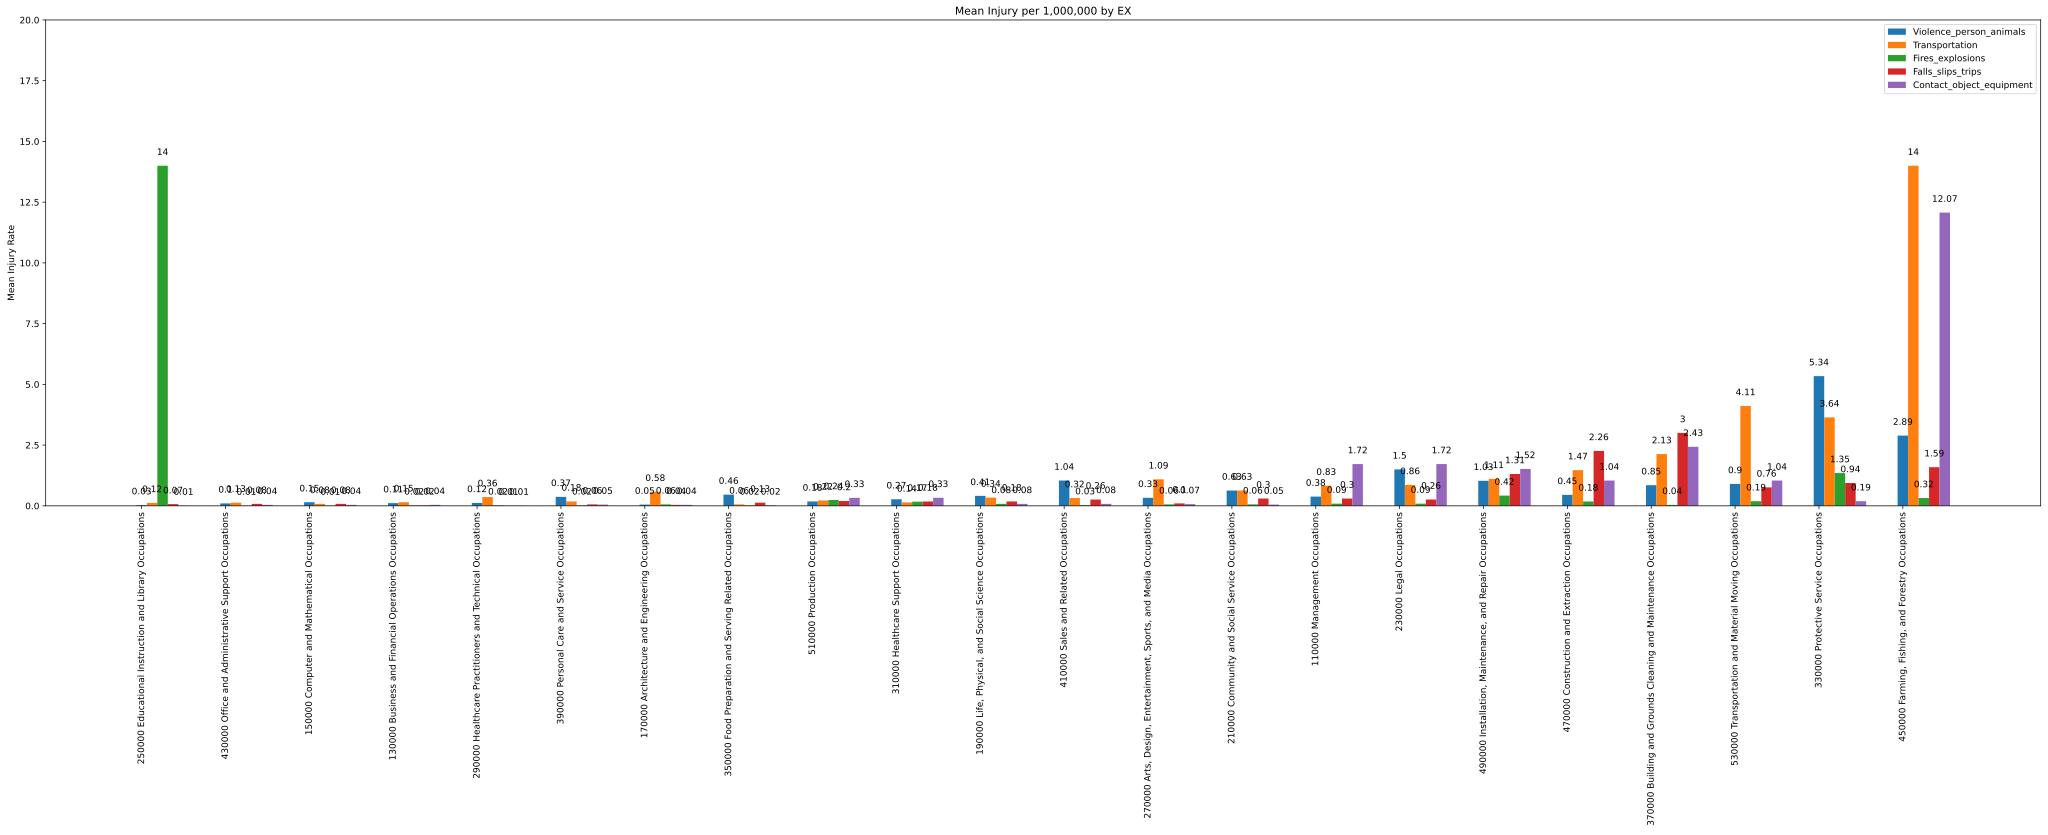

In [33]:
           
groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(1000000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

print(len(grpd))
print(len(grpd[0]))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)

    
title = "Mean Injury per 1,000,000 by EX"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

ax.set_ylim(0, 20)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()